In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

In [154]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm

In [160]:
df=pd.read_csv('train.csv')

In [152]:
df=df.drop(["Unnamed: 0"], axis=1)

In [153]:
df

,stock,date,neg,neu,pos,compound,open,high,low,close,adj close,volume
0,AAPL,2023-10-01,0.0605,0.8815,0.0575,-0.4582,171.220001,174.300003,170.929993,173.750000,173.521393,5.216450e+07
1,AAPL,2023-10-02,0.0410,0.8930,0.0660,0.2672,171.220001,174.300003,170.929993,173.750000,173.521393,5.216450e+07
2,AAPL,2023-10-03,0.0215,0.9080,0.0705,0.9749,172.259995,173.630005,170.820007,172.399994,172.173172,4.959460e+07
3,AAPL,2023-10-04,0.0170,0.8830,0.1000,0.9827,171.089996,174.210007,170.970001,173.660004,173.431519,5.302030e+07
4,AAPL,2023-10-05,0.0180,0.8855,0.0965,0.9552,173.789993,175.449997,172.679993,174.910004,174.679871,4.852790e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
501,XOM,2023-10-22,0.0350,0.8740,0.0910,0.9863,111.393331,111.746666,109.383334,109.993332,108.996633,1.960327e+07
502,XOM,2023-10-23,0.0350,0.8740,0.0910,0.9863,110.629997,110.959999,108.680000,109.449997,108.458221,1.818500e+07
503,XOM,2023-10-24,0.0285,0.8685,0.1025,0.9935,109.699997,109.820000,108.120003,108.389999,107.407829,1.678610e+07
504,XOM,2023-10-25,0.0265,0.8590,0.1145,0.9820,108.519997,109.500000,108.129997,108.589996,107.606010,2.204730e+07


In [112]:
stocks=df.stock.unique()

In [174]:
df=pd.read_csv('train.csv')

In [175]:
df

,Unnamed: 0,stock,date,neg,neu,pos,compound,open,high,low,close,adj close,volume
0,0,AAPL,2023-10-01,0.0605,0.8815,0.0575,-0.4582,171.220001,174.300003,170.929993,173.750000,173.521393,5.216450e+07
1,1,AAPL,2023-10-02,0.0410,0.8930,0.0660,0.2672,171.220001,174.300003,170.929993,173.750000,173.521393,5.216450e+07
2,2,AAPL,2023-10-03,0.0215,0.9080,0.0705,0.9749,172.259995,173.630005,170.820007,172.399994,172.173172,4.959460e+07
3,3,AAPL,2023-10-04,0.0170,0.8830,0.1000,0.9827,171.089996,174.210007,170.970001,173.660004,173.431519,5.302030e+07
4,4,AAPL,2023-10-05,0.0180,0.8855,0.0965,0.9552,173.789993,175.449997,172.679993,174.910004,174.679871,4.852790e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,XOM,2023-10-22,0.0350,0.8740,0.0910,0.9863,111.393331,111.746666,109.383334,109.993332,108.996633,1.960327e+07
502,502,XOM,2023-10-23,0.0350,0.8740,0.0910,0.9863,110.629997,110.959999,108.680000,109.449997,108.458221,1.818500e+07
503,503,XOM,2023-10-24,0.0285,0.8685,0.1025,0.9935,109.699997,109.820000,108.120003,108.389999,107.407829,1.678610e+07
504,504,XOM,2023-10-25,0.0265,0.8590,0.1145,0.9820,108.519997,109.500000,108.129997,108.589996,107.606010,2.204730e+07


In [229]:
df=pd.read_csv('train.csv')
cv = TimeSeriesSplit(4, test_size=3)    

ma_rmses = np.zeros((4))


i = 0


for train_index, test_index in cv.split(df[df.stock=='AAPL']):
    tt = df.iloc[train_index]
    ho = df.iloc[test_index]
    for lag in range(1, 3):  # Adjust the lag range as needed
        tt[f'volume_Lag_{lag}'] = tt['volume'].shift(lag)
    for lag in range(1, 3):  # Adjust the lag range as needed
        ho[f'volume_Lag_{lag}'] = ho['volume'].shift(lag)

    features = ['neg', 'pos', 'compound', 'volume_Lag_1', 'volume_Lag_2']#, 'volume_Lag_3', 'volume_Lag_4']
    target = 'volume'
    tt = tt.dropna()
    ho = ho.dropna()
    
    model = sm.OLS(tt[target], tt[features])
    results = model.fit()
    pred = results.predict(ho[features])
    
# Display regression summary
    
 #   print(results.summary())
    ma_rmses[i] = np.sqrt(mean_squared_error(ho.volume.values, pred))
    
    i = i + 1

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/2795219429.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt[f'volume_Lag_{lag}'] = tt['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/2795219429.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt[f'volume_Lag_{lag}'] = tt['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/2795219429.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [230]:
np.mean(np.sqrt(ma_rmses))

2749.4869820532613

In [228]:
ma_rmses

array([ 6360553.86477812, 13498322.24970569,  6085899.06007102,
        2777144.73231163])

In [183]:
tt

,Unnamed: 0,stock,date,neg,neu,pos,compound,open,high,low,close,adj close,volume,volume_Lag_1,volume_Lag_2,volume_Lag_3
3,3,AAPL,2023-10-04,0.0170,0.8830,0.1000,0.9827,171.089996,174.210007,170.970001,173.660004,173.431519,5.302030e+07,4.959460e+07,52164500.0,52164500.0
4,4,AAPL,2023-10-05,0.0180,0.8855,0.0965,0.9552,173.789993,175.449997,172.679993,174.910004,174.679871,4.852790e+07,5.302030e+07,49594600.0,52164500.0
5,5,AAPL,2023-10-06,0.0365,0.8190,0.1440,0.9986,173.800003,177.990005,173.179993,177.490005,177.256485,5.722410e+07,4.852790e+07,53020300.0,49594600.0
6,6,AAPL,2023-10-07,0.0160,0.8480,0.1360,0.9996,174.803335,178.343338,174.053330,177.990005,177.755824,5.227967e+07,5.722410e+07,48527900.0,53020300.0
7,7,AAPL,2023-10-08,0.0140,0.8985,0.0870,0.9927,175.806666,178.696670,174.926666,178.490005,178.255162,4.733523e+07,5.227967e+07,57224100.0,48527900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,491,XOM,2023-10-12,0.0150,0.8170,0.1680,0.9984,107.589996,107.839996,106.089996,106.470001,105.505226,3.118300e+07,5.793900e+07,13892000.0,22369900.0
492,492,XOM,2023-10-13,0.0285,0.8225,0.1490,0.9994,108.029999,110.199997,107.839996,109.870003,108.874420,3.027650e+07,3.118300e+07,57939000.0,13892000.0
493,493,XOM,2023-10-14,0.0245,0.8860,0.0895,0.9903,108.853333,110.359998,108.269996,109.896668,108.900843,2.633500e+07,3.027650e+07,31183000.0,57939000.0
494,494,XOM,2023-10-15,0.0090,0.9030,0.0885,0.9919,109.676666,110.519999,108.699997,109.923332,108.927267,2.239350e+07,2.633500e+07,30276500.0,31183000.0


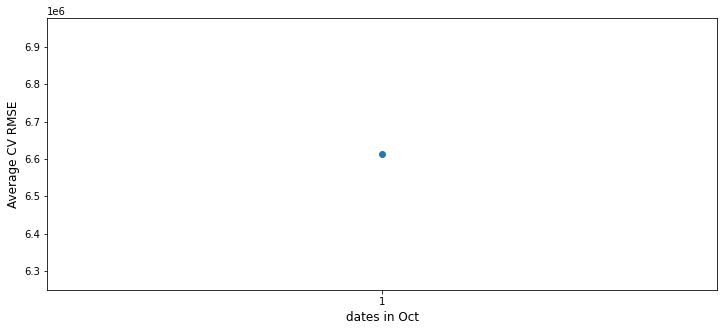

In [139]:
plt.figure(figsize=(12,5))

plt.scatter(range(start,end), np.mean(ma_rmses, axis=0))

plt.xlabel("dates in Oct", fontsize=12)
plt.ylabel("Average CV RMSE", fontsize=12)

plt.xticks(range(start, end, 3), fontsize=10)
plt.yticks(fontsize=10)

plt.show()

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/pytho

Mean Squared Error: 3960292881226.581


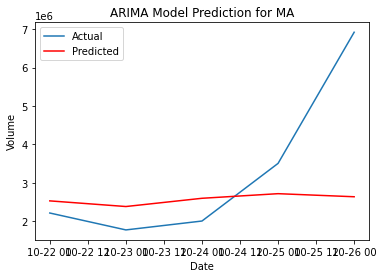

In [233]:
import pandas as pd
import ssl
from urllib.request import urlopen

ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/supriyouva/Stocks-prediction-using-ML/main/data/train.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the dataset from Supriyo's GitHub 
url = 'https://raw.githubusercontent.com/supriyouva/Stocks-prediction-using-ML/main/data/train.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')


symbol = 'MA' 

stock_data = df[df['stock'] == symbol]
ts = stock_data['volume']

train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# Train the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust the order as needed
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title(f'ARIMA Model Prediction for {symbol}')
plt.legend()
plt.show()